This Kernel for someone want to deep dive into image classification. I use CNN for classification model. If you found this Kernel helpful please up vote it. If you have some feedback and question don't forget to comment below. 

I have simplier model with 
* https://www.kaggle.com/uysimty/get-start-image-classification

# Import Library

In [268]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
print(os.listdir("cats_and_dogs_filtered"));
%matplotlib inline

import matplotlib.image as mpimg

['test', 'vectorize.py', 'train', '.ipynb_checkpoints', 'validation']


# Define Constants

In [269]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

# Prepare Traning Data

In [205]:
# import zipfile
# path_to_zip_file = '../input/test1.zip'
# with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
#     zip_ref.extractall('.')
# zip_ref.close()

In [206]:
# import zipfile
# path_to_zip_file = '../input/train.zip'
# with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
#     zip_ref.extractall('.')
# zip_ref.close()

In [270]:
import os

base_dir = 'cats_and_dogs_filtered/'
train_dir = os.path.join(base_dir, 'train/')
test_dir = os.path.join(base_dir, 'test/') 
validation_dir = os.path.join(base_dir, 'validation/')

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))


Contents of base directory:
['test', 'vectorize.py', 'train', '.ipynb_checkpoints', 'validation']

Contents of train directory:
['dogs', 'cats']

Contents of validation directory:
['dogs', 'cats']


In [271]:
# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats/')
train_dogs_dir = os.path.join(train_dir, 'dogs/')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats/')
validation_dogs_dir = os.path.join(validation_dir, 'dogs/')


In [274]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.952.jpg', 'cat.946.jpg', 'cat.6.jpg', 'cat.749.jpg', 'cat.991.jpg', 'cat.985.jpg', 'cat.775.jpg', 'cat.761.jpg', 'cat.588.jpg', 'cat.239.jpg']
['dog.775.jpg', 'dog.761.jpg', 'dog.991.jpg', 'dog.749.jpg', 'dog.985.jpg', 'dog.952.jpg', 'dog.946.jpg', 'dog.211.jpg', 'dog.577.jpg', 'dog.563.jpg']


In [275]:
categories = []
filenames = []
for filename in enumerate(train_cat_fnames + train_dog_fnames):
    # print(filename[1])
    category = filename[1].split('.')[0]
    filenames.append(filename[1])
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [276]:
print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.952.jpg', 'cat.946.jpg', 'cat.6.jpg', 'cat.749.jpg', 'cat.991.jpg', 'cat.985.jpg', 'cat.775.jpg', 'cat.761.jpg', 'cat.588.jpg', 'cat.239.jpg']
['dog.775.jpg', 'dog.761.jpg', 'dog.991.jpg', 'dog.749.jpg', 'dog.985.jpg', 'dog.952.jpg', 'dog.946.jpg', 'dog.211.jpg', 'dog.577.jpg', 'dog.563.jpg']


In [212]:
df.head()

,filename,category
0,cat.952.jpg,0
1,cat.946.jpg,0
2,cat.6.jpg,0
3,cat.749.jpg,0
4,cat.991.jpg,0


In [213]:
df.tail()

,filename,category
1995,dog.977.jpg,1
1996,dog.744.jpg,1
1997,dog.750.jpg,1
1998,dog.988.jpg,1
1999,dog.778.jpg,1


### See Total In count

<AxesSubplot: >

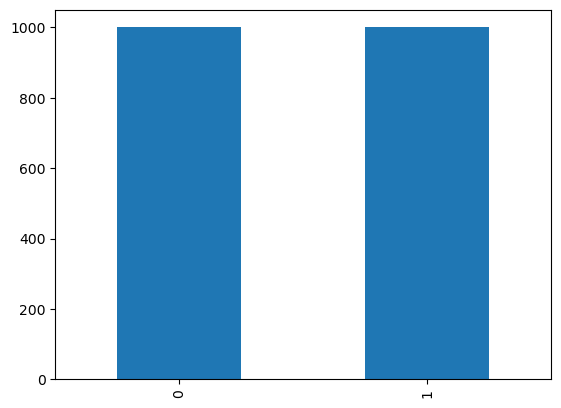

In [214]:
df['category'].value_counts().plot.bar()

From our data we have 12000 cats and 12000 dogs

# See sample image

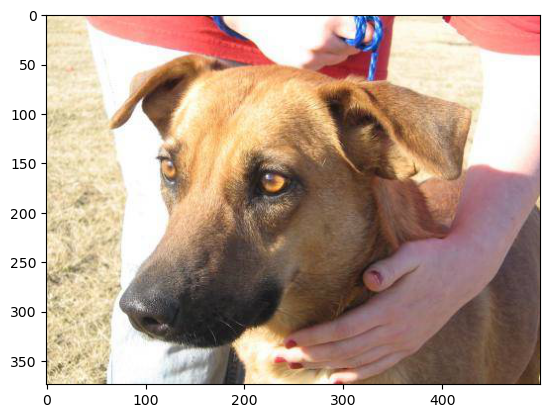

In [277]:
sample = random.choice(filenames)
try:
    image = mpimg.imread(os.path.join(train_cats_dir+sample))
except:
    image = mpimg.imread(os.path.join(train_dogs_dir+sample))
    
plt.imshow(image)


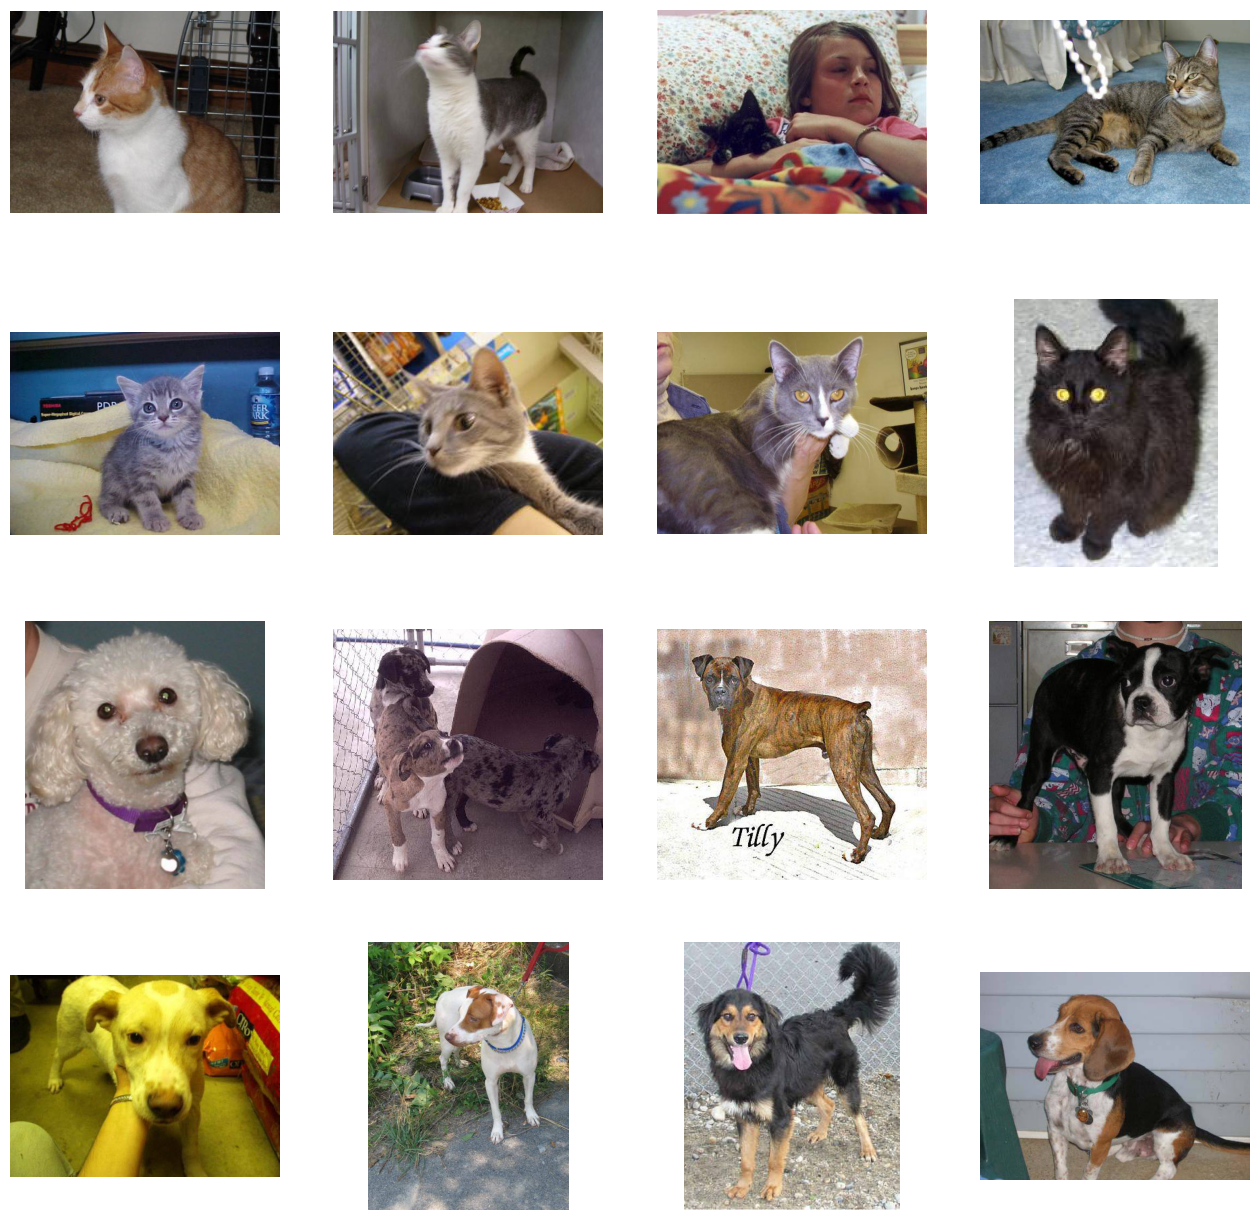

In [278]:
# Set up matplotlib fig, and size it to fit 4x4 pics
# print(plt.get_fignums())
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Build Model

<img src="https://i.imgur.com/ebkMGGu.jpg" width="100%"/>

* **Input Layer**: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.
* **Conv Layer**: This layer will extract features from image.
* **Pooling Layer**: This layerreduce the spatial volume of input image after convolution.
* **Fully Connected Layer**: It connect the network from a layer to another layer
* **Output Layer**: It is the predicted values layer. 

In [279]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes
# Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_24 (Bat  (None, 126, 126, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_25 (Bat  (None, 61, 61, 64)      

# Callbacks

In [280]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

**Early Stop**

To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

In [219]:
earlystop = EarlyStopping(patience=10)

**Learning Rate Reduction**

We will reduce the learning rate when then accuracy not increase for 2 steps

In [281]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.001)

In [282]:
callbacks = [earlystop, learning_rate_reduction]

# Prepare data

Because we will use image genaretor `with class_mode="categorical"`. We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification. 

So we will convert 1 to dog and 0 to cat

In [283]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [284]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<AxesSubplot: >

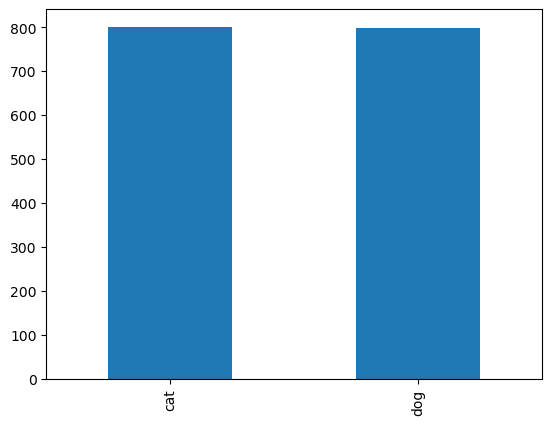

In [258]:
train_df['category'].value_counts().plot.bar()

In [285]:
validate_df.sample(10)

,filename,category
398,cat.53.jpg,cat
32,cat.654.jpg,cat
306,dog.982.jpg,dog
220,cat.960.jpg,cat
193,cat.759.jpg,cat
340,dog.263.jpg,dog
161,cat.623.jpg,cat
334,cat.853.jpg,cat
22,dog.432.jpg,dog
395,cat.619.jpg,cat


In [286]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

### Traning Generator

In [292]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# train_generator = train_datagen.flow_from_dataframe(
#     train_df, 
#     "train/", 
#     x_col='filename',
#     y_col='category',
#     target_size=IMAGE_SIZE,
#     class_mode='categorical',
#     batch_size=batch_size
# )
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=batch_size,
    class_mode='binary',
    target_size=IMAGE_SIZE
)  

Found 2000 images belonging to 2 classes.


### Validation Generator

In [298]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator =  validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=batch_size,
    class_mode  = 'binary',
    target_size = IMAGE_SIZE
)


Found 1000 images belonging to 2 classes.


In [299]:
print(validation_generator.class_indices)
print(validation_generator.n)
print(len(validation_generator))

{'cats': 0, 'dogs': 1}
1000
67


In [316]:
X_val, y_val = validation_generator.__next__()
print(X_val.shape, y_val.shape)

(15, 128, 128, 3) (15,)


AxesSubplot(0.125,0.653529;0.227941x0.226471)
AxesSubplot(0.398529,0.653529;0.227941x0.226471)
AxesSubplot(0.672059,0.653529;0.227941x0.226471)
AxesSubplot(0.125,0.381765;0.227941x0.226471)
AxesSubplot(0.398529,0.381765;0.227941x0.226471)
AxesSubplot(0.672059,0.381765;0.227941x0.226471)
AxesSubplot(0.125,0.11;0.227941x0.226471)
AxesSubplot(0.398529,0.11;0.227941x0.226471)
AxesSubplot(0.672059,0.11;0.227941x0.226471)


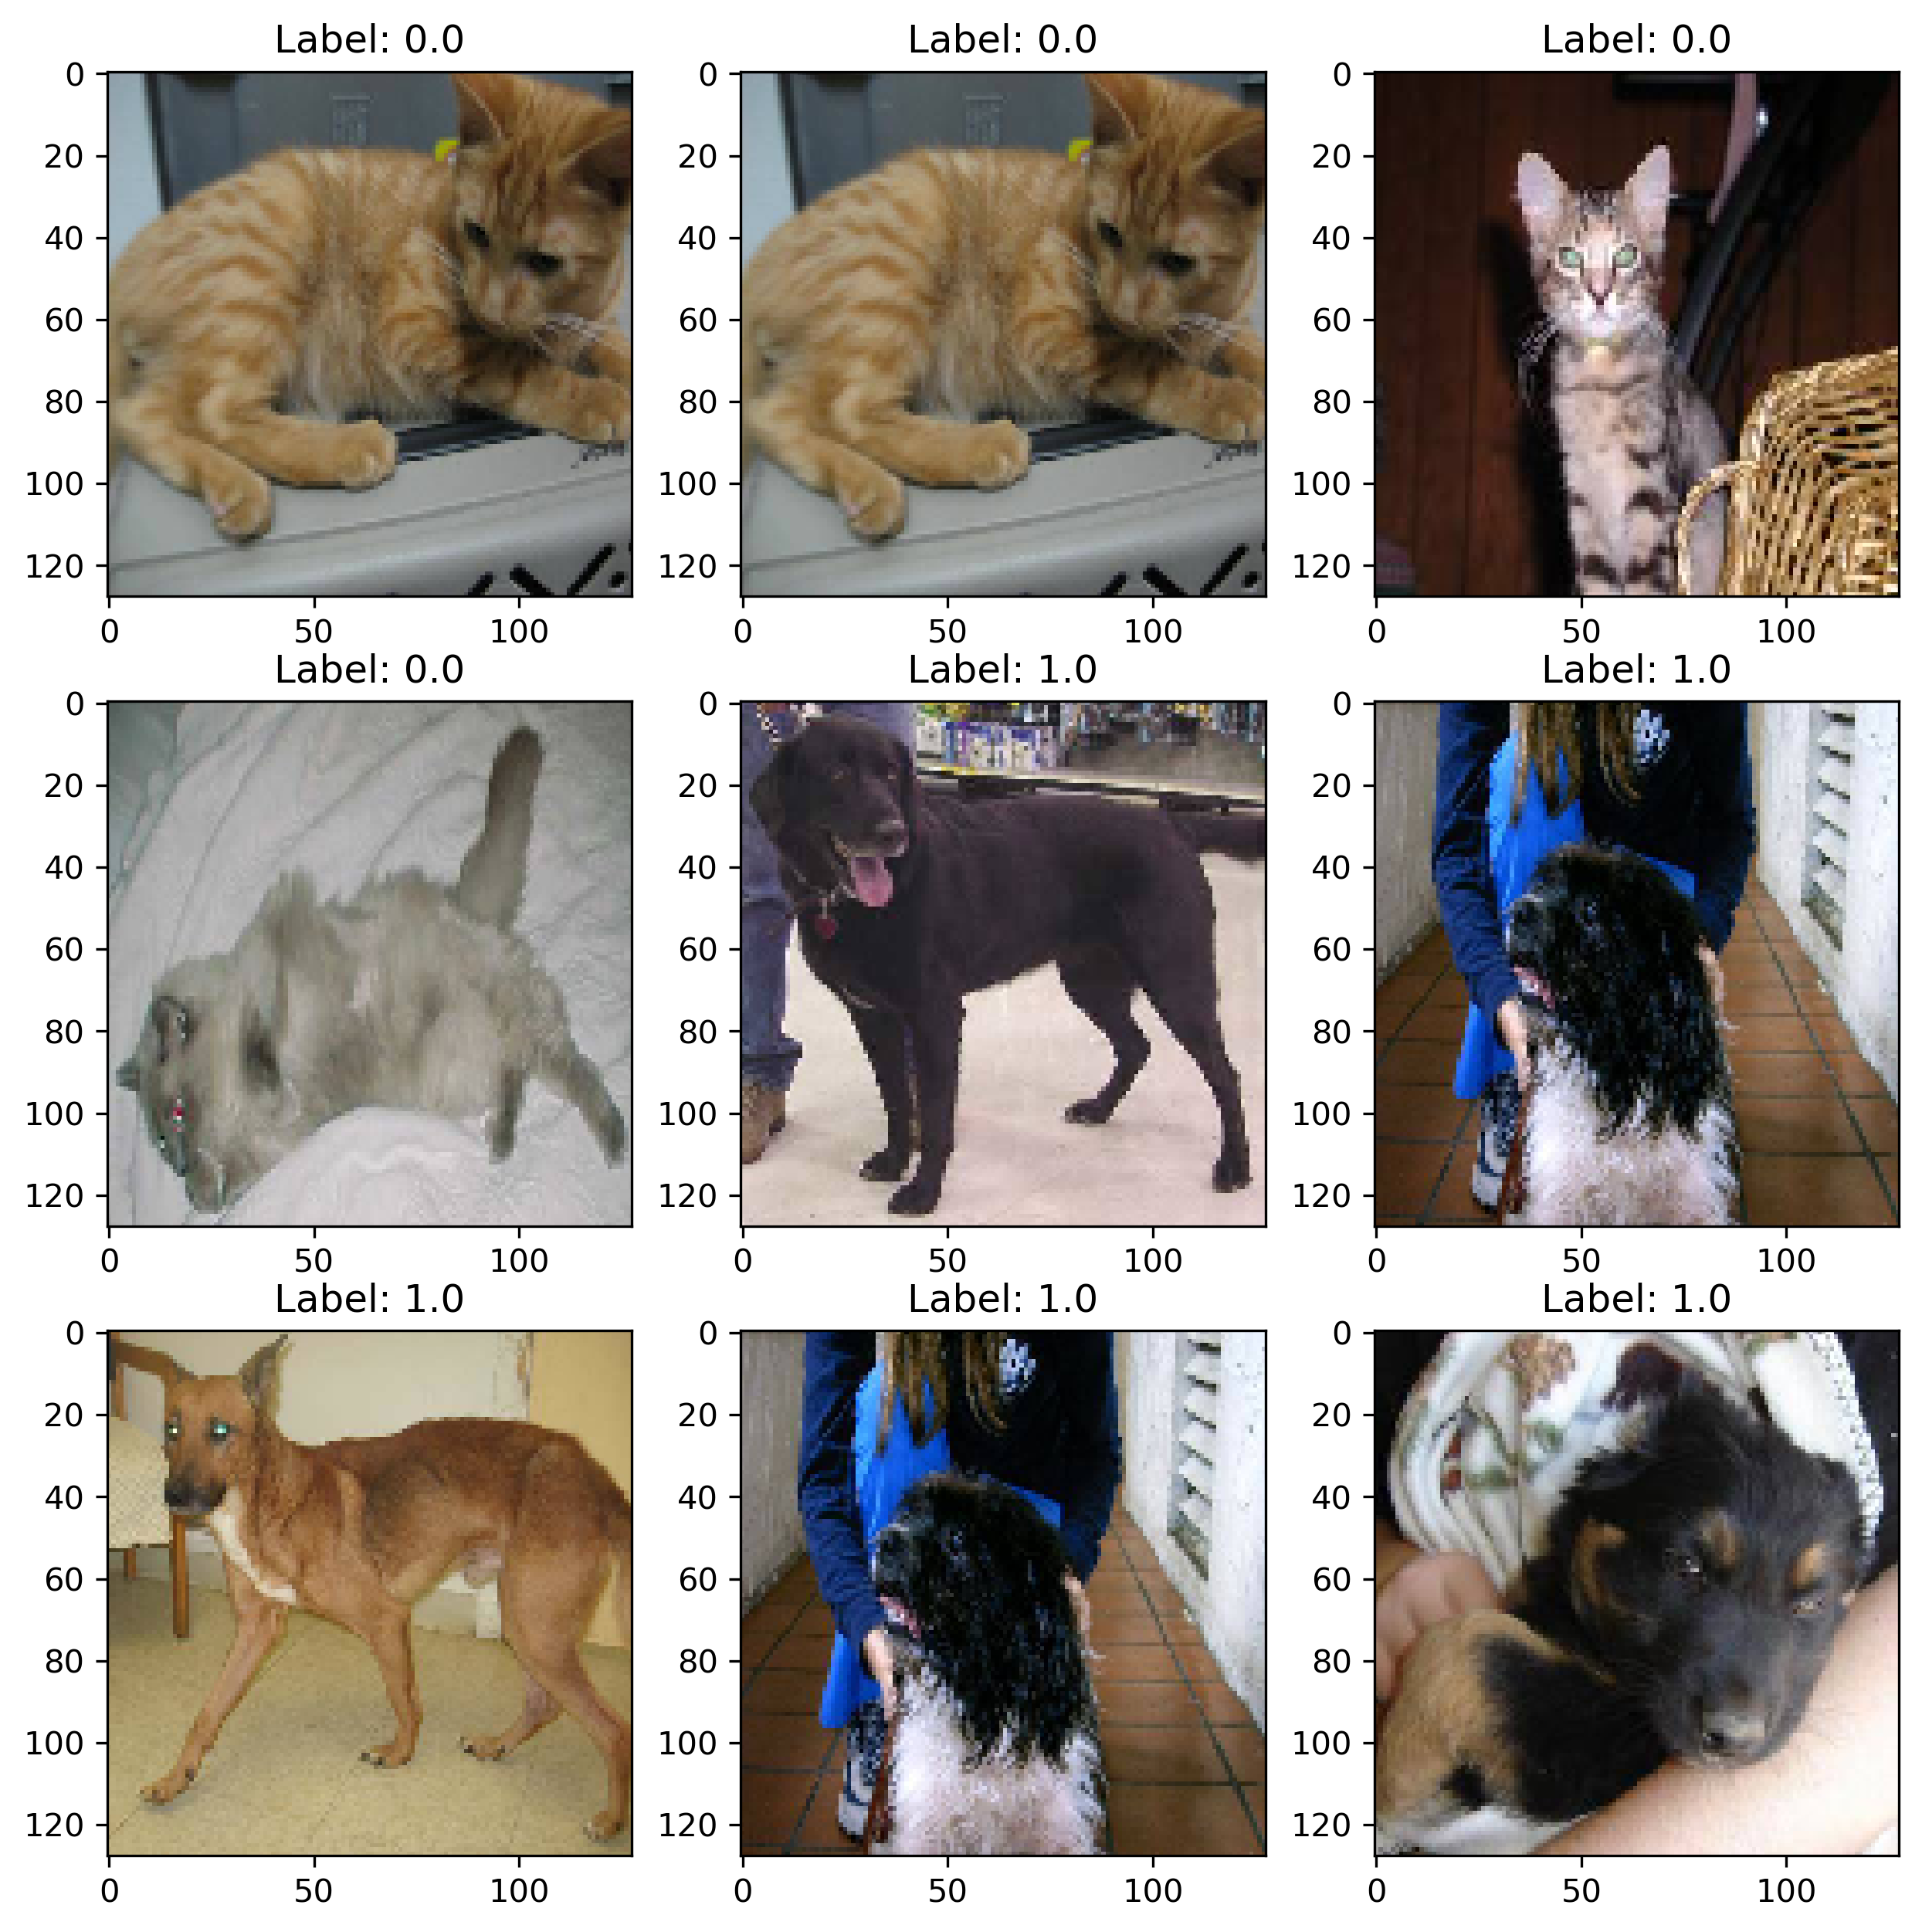

In [301]:
import numpy as np
import matplotlib.pyplot as plt

num_images = 3

random_indices = np.random.randint(0, X_val.shape[0], 9)

# Get the images and labels at those indices
images = X_val[random_indices]
labels = y_val[random_indices]

# Set up the plot with 3 rows and 3 columns
fig, axs = plt.subplots(3, 3, 
                        figsize=(10,10), 
                        dpi=300)

# Display the images and labels
for i in range(3):
  for j in range(3):
    print(axs[i,j])
    axs[i, j].imshow(images[i * 3 + j], cmap='gray')
    axs[i, j].set_title(f"Label: {labels[i * 3 + j]}")

plt.show()

Seem to be nice 

# Fit Model

In [232]:
batch_size

15

In [233]:
import tensorflow as tf
# print(tf.test.gpu_device_name())

In [302]:
model.reset_states()

In [303]:

epochs=3 if FAST_RUN else 15
# with tf.device('/device:GPU:0'):
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/15


/var/folders/7p/nhr_8mz933v_4r1mwyd3_jg40000gp/T/ipykernel_4402/997841080.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


106/106 [==============================] - 14s 127ms/step - loss: 1.0506 - accuracy: 0.5711 - val_loss: 3.5350 - val_accuracy: 0.5179 - lr: 0.0010
Epoch 2/15
106/106 [==============================] - 14s 127ms/step - loss: 0.8427 - accuracy: 0.5880 - val_loss: 1.2822 - val_accuracy: 0.5154 - lr: 0.0010
Epoch 3/15
106/106 [==============================] - 14s 129ms/step - loss: 0.7697 - accuracy: 0.6285 - val_loss: 2.1353 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/15
106/106 [==============================] - 13s 124ms/step - loss: 0.7041 - accuracy: 0.6468 - val_loss: 0.8070 - val_accuracy: 0.5615 - lr: 0.0010
Epoch 5/15
106/106 [==============================] - 13s 124ms/step - loss: 0.6866 - accuracy: 0.6222 - val_loss: 0.6119 - val_accuracy: 0.6462 - lr: 0.0010
Epoch 6/15
106/106 [==============================] - 13s 125ms/step - loss: 0.6497 - accuracy: 0.6620 - val_loss: 0.5470 - val_accuracy: 0.7128 - lr: 0.0010
Epoch 7/15
106/106 [==============================] - 14s 128ms

# Save Model

In [304]:
model.save_weights("model.h5")

# Virtualize Training

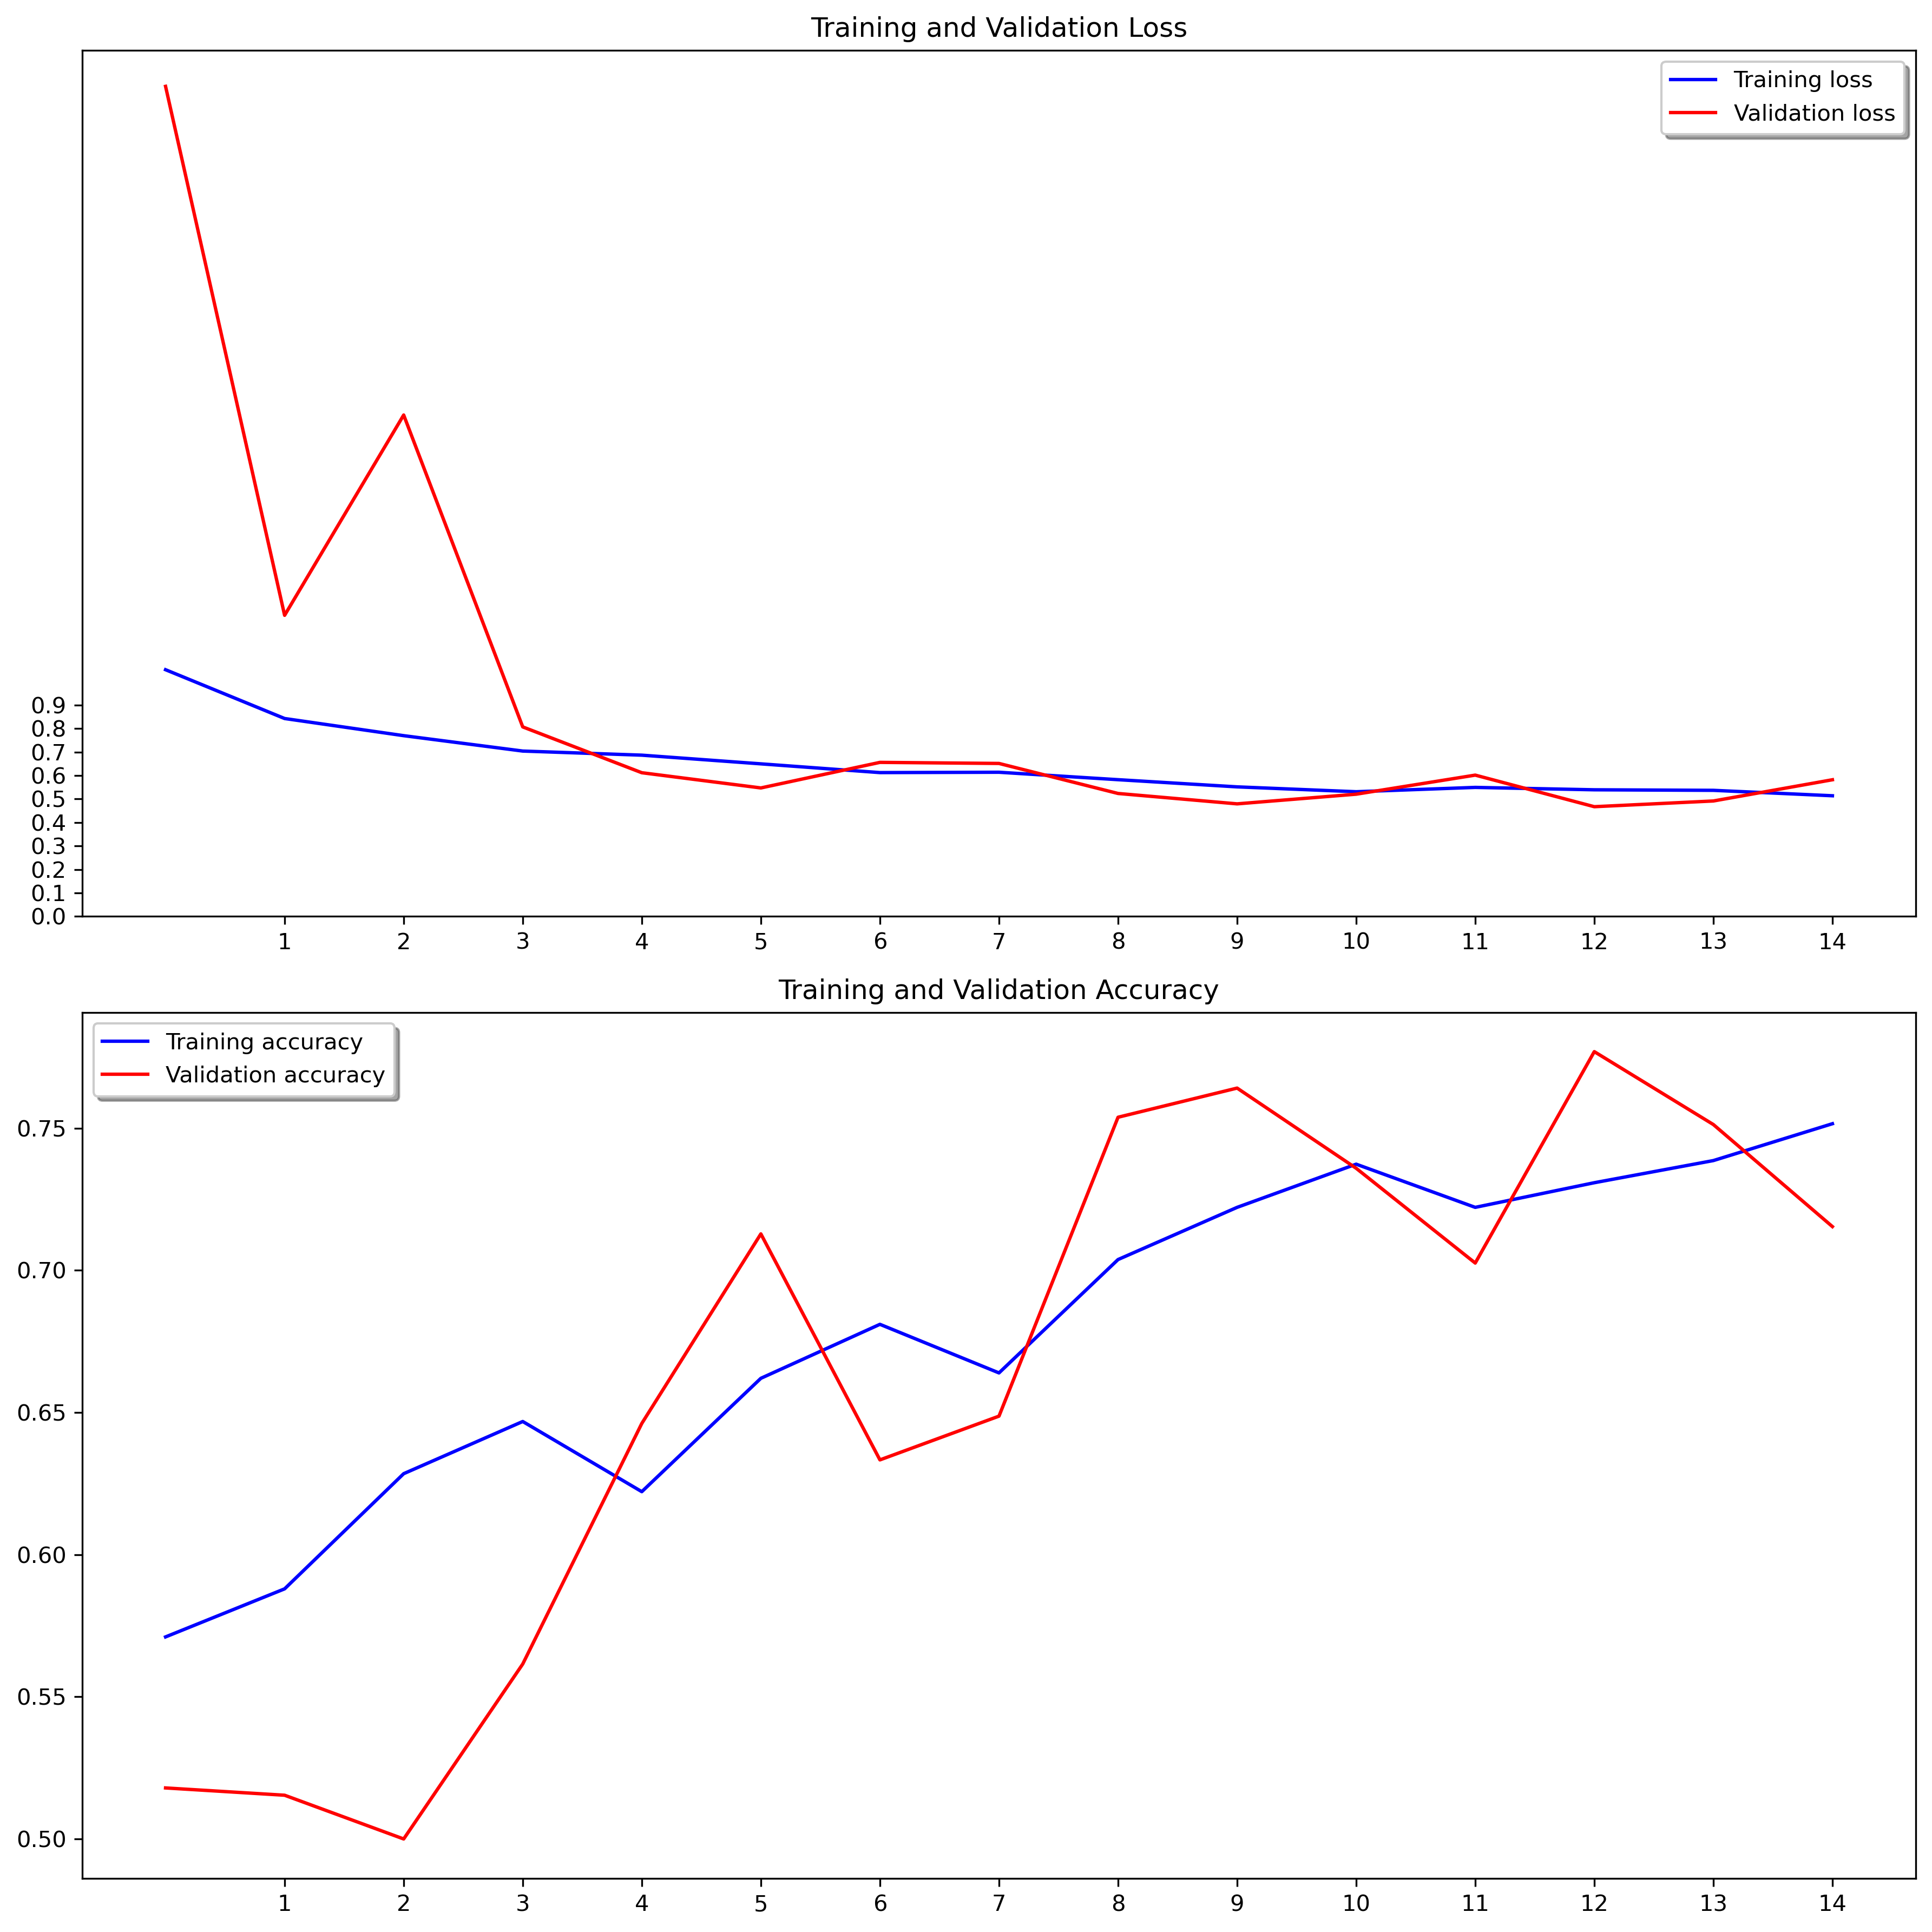

In [305]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), dpi=300)
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="Validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.set_title('Training and Validation Loss')
ax1.legend(loc='best', shadow=True)

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))
ax2.set_title('Training and Validation Accuracy')
ax2.legend(loc='best', shadow=True)

# legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Prepare Testing Data

In [306]:
test_filenames = os.listdir(test_dir)
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

# Create Testing Generator

In [310]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    validation_dir,
    batch_size=batch_size,
    class_mode  = 'binary',
    target_size = IMAGE_SIZE
)

Found 1000 images belonging to 2 classes.


## Performance model evaluation

In [311]:
preds = model.predict_generator(validation_generator, 
                                  steps=total_validate//batch_size + 1,
                                  verbose=1)

 1/27 [>.............................] - ETA: 3s

/var/folders/7p/nhr_8mz933v_4r1mwyd3_jg40000gp/T/ipykernel_4402/3266190757.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(validation_generator,


27/27 [==============================] - 1s 39ms/step


In [312]:
preds.shape

(405, 1)

In [313]:
y_val_pred = np.argmax(preds, axis=1)
print(y_val_pred.shape)

(405,)


In [322]:
len(y_val_pred), len(os.listdir(validation_dir))


(405, 2)

In [323]:
y_val_pred[:10]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [324]:
validation_dir[:10]

'cats_and_d'

From our prepare data part. We map data with `{1: 'dog', 0: 'cat'}`. Now we will map the result back to dog is 1 and cat is 0